In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

#make sure matplotlib is exporting editable text
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
fp1 = '/Users/junyaokang/Desktop/TE/ML_Pyrite/data/TE_Data.csv'
TE_Data = pd.read_csv(fp1)

#get the data
X_Data = TE_Data.iloc[:, 3:].copy()

#get the label
labels = TE_Data.iloc[:, 2].copy()

feature_names = list(X_Data.columns)

#power transform and standardize the data
pt = PowerTransformer()
#fit the data
pt.fit(X_Data)

#transform the data, and then add column names to features
X_Data = pd.DataFrame(pt.transform(X_Data), columns = feature_names)


In [3]:
#Conduct PCA analysis
pca = PCA()
pca.fit(X_Data)
X_transformed = pca.fit_transform(X_Data)

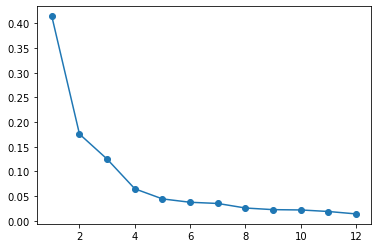

In [4]:
#Variance explained by each component
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_ratio_, '-o')
plt.savefig("PCA_scree.pdf", dpi=150)

#### The first principal component (PC1)

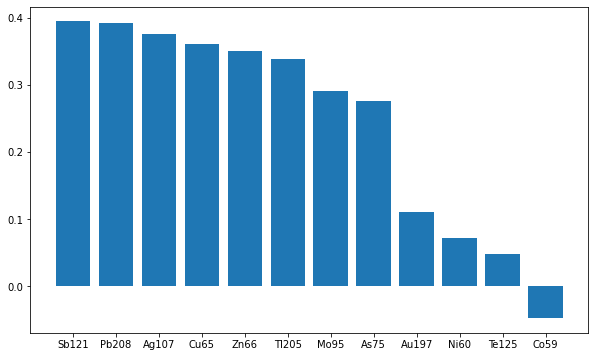

In [16]:
#Feature loading
PC1_Load_data = np.stack((pca.feature_names_in_, pca.components_[0,:]),axis=1)
#Construct a dataframe
PC1_Load = pd.DataFrame(PC1_Load_data, columns=['feature','load'])

#Sort the load
PC1_Load_sorted = PC1_Load.sort_values(by=['load'], ascending=False)

plt.figure(figsize=(10,6))
plt.bar(PC1_Load_sorted['feature'], PC1_Load_sorted['load'])

plt.savefig("PC_1_Loading.pdf", dpi=150)

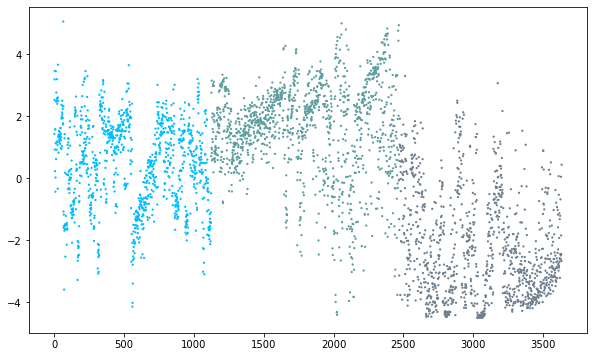

In [17]:
#set the color for each label
my_palette = dict(zip(labels.unique(), ['deepskyblue','cadetblue','slategray']))
colors = labels.map(my_palette)

#plot the PC1 for evey pyrite analysis
plt.figure(figsize=(10,6))
plt.scatter(range(1,pca.n_samples_+1), X_transformed[:,0], s=1.5, c=colors)

#### The second principal component (PC2)

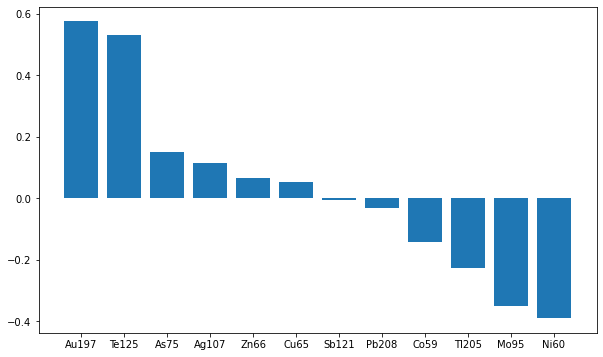

In [18]:
#Feature loading
PC2_Load_data = np.stack((pca.feature_names_in_, pca.components_[1,:]),axis=1)
#Construct a dataframe
PC2_Load = pd.DataFrame(PC2_Load_data, columns=['feature','load'])

#Sort the load
PC2_Load_sorted = PC2_Load.sort_values(by=['load'], ascending=False)

plt.figure(figsize=(10,6))
plt.bar(PC2_Load_sorted['feature'], PC2_Load_sorted['load'])

plt.savefig("PC_2_Loading.pdf", dpi=150)

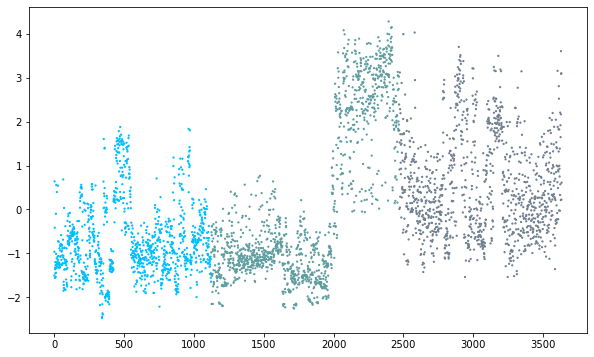

In [19]:
my_palette = dict(zip(labels.unique(), ['deepskyblue','cadetblue','slategray']))
colors = labels.map(my_palette)

plt.figure(figsize=(10,6))
plt.scatter(range(1,pca.n_samples_+1), X_transformed[:,1], s=1.5, c=colors)

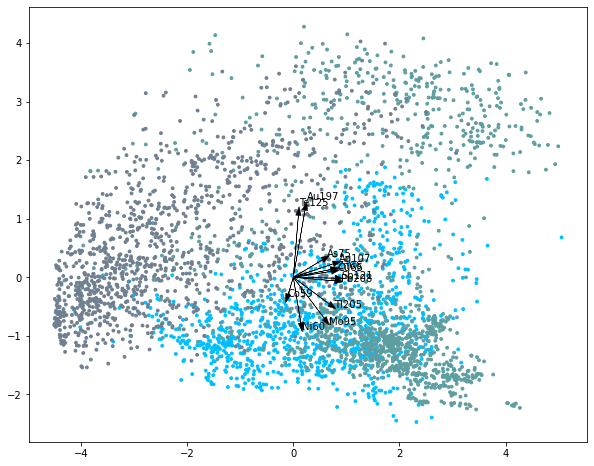

In [20]:
#plot the PCA biplot, arrows represent feature loadings
plt.figure(figsize=(10,8))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=8, c=colors)

for i, label in enumerate(pca.feature_names_in_):
    plt.arrow(0, 0, PC1_Load.iloc[i,1]*2, PC2_Load.iloc[i,1]*2, head_width=0.1, color='black', linewidth=0.5)
    plt.text(PC1_Load.iloc[i,1]*2*1.15, PC2_Load.iloc[i,1]*2*1.15, label)

plt.savefig("PCA_biplot.pdf", dpi=150)